![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [36]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()
#print(bikes.describe)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [37]:
# Celda 1.1
print(bikes.groupby('workingday').total.mean())
print("\n")
print(bikes.groupby('workingday').total.min())
print("\n")
print(bikes.groupby('workingday').total.max())



workingday
0    188.506621
1    193.011873
Name: total, dtype: float64


workingday
0    1
1    1
Name: total, dtype: int64


workingday
0    783
1    977
Name: total, dtype: int64


La variable predictora Workingday es categórica y posee 2 niveles. 1 Si es día laboral y 0 de lo contrario. Para cuando el día no es laboral (Workingday = 0) tenemos que el número de bicicletas promedio que se rentan es 188, mientras que cuando el día es laboral se rentan en promedio 193 bicicletas. 

Adicionalmente, tenemos que el mínimo de bicicletas que se prestan en cualquier día es de 1. Sin embargo, cuando el día es laboral se han prestado hasta 977, por otro lado, cuando el día no es laboral se han prestado hasta 783. 

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64






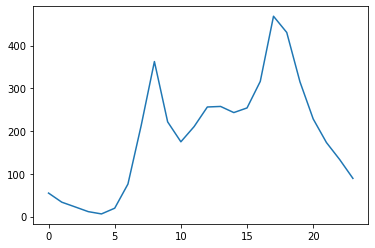

In [38]:
# Celda 1.2
aux = bikes.groupby('hour').total.mean()
print(aux)
print("\n")
print(plt.plot(aux))
print("\n")
#print(aux.min())
#print(aux.max())



Para la variable "horas" tenemos 24 categorías correspondientes a las horas del día. Se puede definir que la hora que menos demanda de bicicletas tiene es 4:00 AM (6,4 bicicletas en promedio se rentan a esta hora). Por otro lado, la hora que más demanda de bicicletas tiene es 5:00 PM (468 bicicletas en promedio).

Si graficamos el dataset podemos ver el comportamiento de las bicicletas rentadas durante el día. El rango horario donde mas se rentan bicicletas es de 6:AM a 9:00 PM



### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

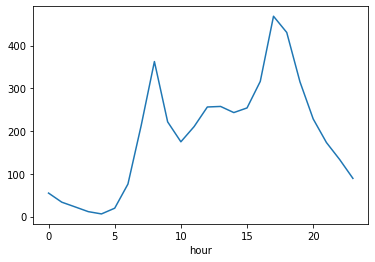

In [39]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

AxesSubplot(0.125,0.125;0.775x0.755)


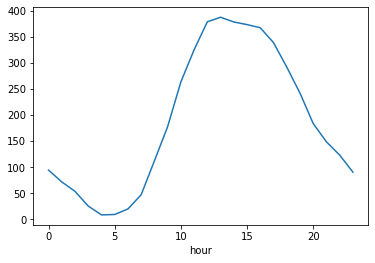

In [40]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
df = bikes.drop(bikes[bikes.workingday == 1].index)
print(df.groupby('hour').total.mean().plot())


Podemos ver que el comportamiento de la renta de bicicletas durante el día cambia dependiendo del tipo de día. La gráfica nos muestra que cuando el día NO es laboral, el comportamiento de la renta tiene una forma senoidal, es decir, el número de bicicletas que se renta oscila.  

La renta de bicicletas alcanza su pico máximo alrededor de las 12:00 PM en este caso (Workingday = 0).

AxesSubplot(0.125,0.125;0.775x0.755)


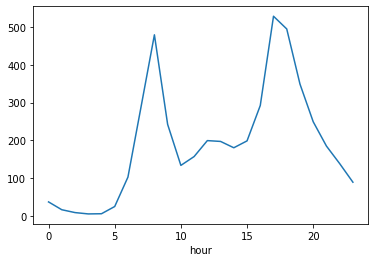

In [41]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 

df = bikes.drop(bikes[bikes.workingday == 0].index)
print(df.groupby('hour').total.mean().plot())



El comportamiento para días laborales es muy parecido al comportamiento base. Esto puede ser producto de que en la base de datos la categoría Workingday=1 predomina a Workingday=0. 

La renta de bicicletas alcanza su pico máximo alrededor de las 5:00 PM en este caso (Workingday = 1]). La hora pico podría explicarse por ser la hora en la que la mayoría de personas que manejan bicicleta salen de sus trabajos. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [42]:
# Celda 3
from sklearn.linear_model import LinearRegression

y_train = bikes["total"] 
bikes['hour'] = pd.factorize(bikes.hour)[0]
bikes['workingday'] = pd.factorize(bikes.workingday)[0]
X_train = pd.concat([bikes['hour'], bikes['workingday']], axis=1)

linearR = LinearRegression().fit(X_train, y_train)
print("B0: " + str(linearR.intercept_))
print("Betas: "+ str(linearR.coef_))

B0: 67.7059502619161
Betas: [10.49206282  4.07248627]


Una de las limitaciones del modelo de regresión lineal es que no es directamente interpretable cuando se tienen una variable con varias categorías.

Para la variable Workingday tenemos un beta de 4, es decir, que para días laborales se tendrá 4 bicicletas rentadas adicionales con respecto a días no laborales. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [43]:
# Celda 4

print("Primera ramificación")

# Impresión variable a usar (WorkingDay)
print(X_train.columns[1])
# División de la variable workingday
filter_l = X_train.iloc[:, 1] == 1
# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
y_l = y_train.loc[filter_l] # y_l: la observación es en dia laboral.
y_r = y_train.loc[~filter_l] # y_r: la observación NO es en dia laboral.
predict_l = np.average(y_l) # Prediccion de la particion l
predict_r = np.average(y_r) # Predicción de la partición r
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )
print("MSE (Workingday = 1) : "+str(MSE_l))
print("MSE (Workingday = 0) : "+str(MSE_r))
print("")

# Impresión variable a usar (Hour)
print(X_train.columns[0])
# División de la variable Hour
filter_2 = X_train.iloc[:, 0] > 5

y_l = y_train.loc[filter_2] # y_l: la observación es despues de las 5 AM.
y_r = y_train.loc[~filter_2] # y_l: la observación es antes de las 5 AM.
predict_l = np.average(y_l)
predict_r = np.average(y_r)
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )

print("MSE (Hour > 5) : " + str(MSE_l))
print("MSE (Hour < 5) : " + str(MSE_r))
print("")
print("Seleccion primer Nodo -> Hour < 5")
print('\n')


print("Segunda ramificación (Hour < 5)")
## Explorar el nodo Hour < 5
filter_3 = (X_train.iloc[:, 0] < 5) & (X_train.iloc[:, 1] == 1) #Nodo Hour < 5 y Workingday = 1
filter_4 = (X_train.iloc[:, 0] < 5) & (X_train.iloc[:, 1] == 0) #Nodo Hour < 5 y Workingday = 0
y_l = y_train.loc[filter_3] # y_l: la observación es antes de las 5 AM y es dia laboral.
y_r = y_train.loc[filter_4] # y_l: la observación es antes de las 5 AM y no es dia laboral.
predict_l, predict_r = np.average(y_l), np.average(y_r)
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )
print("NODO FINAL - MSE (Hour < 5) & (Workingday = 1): " + str(MSE_l))
print("NODO FINAL - MSE (Hour < 5) & (Workingday = 0): " + str(MSE_r))

print('\n')
print("Tercera ramificación (Hour > 5)")
## Explorar el nodo Hour < 5
filter_5 = (X_train.iloc[:, 0] > 5) & (X_train.iloc[:, 0] < 7) #Nodo 5 < Hour < 7
filter_6 = (X_train.iloc[:, 0] >= 7) & (X_train.iloc[:, 0] < 24) #Nodo 7 < Hour < 23

y_l = y_train.loc[filter_5] # y_l: la observación es entre las 5 AM y las 7 AM.
y_r = y_train.loc[filter_6] # y_l: la observación es entre las 7 AM y las 24.
predict_l, predict_r = np.average(y_l), np.average(y_r)
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )
print("MSE (5 < Hour < 7): " + str(MSE_l))
print("MSE (7 < Hour < 23): " + str(MSE_r))
print("")
print("Seleccion tercer Nodo -> 5 < Hour < 7")
print('\n')
print("Cuarta ramificación (5 < Hour < 7) ")
filter_7 = (X_train.iloc[:, 0] > 5) & (X_train.iloc[:, 0] < 7) & (X_train.iloc[:, 1] == 1) #Nodo 5 < Hour < 7 en dia laboral.
filter_8 = (X_train.iloc[:, 0] > 5) & (X_train.iloc[:, 0] < 7) & (X_train.iloc[:, 1] == 0) #Nodo 5 < Hour < 7 en dia no laboral.
y_l = y_train.loc[filter_7] # y_l: la observación es entre 5 y 7 AM es dia laboral.
y_r = y_train.loc[filter_8] # y_l: la observación es es entre 5 y 7 AM y no es dia laboral.
predict_l, predict_r = np.average(y_l), np.average(y_r)
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )
print("NODO FINAL - MSE (5 < Hour < 7) & (Workingday = 1): " + str(MSE_l))
print("NODO FINAL - MSE (5 < Hour < 7) & (Workingday = 0): " + str(MSE_r))

print('\n')
print("Quinta ramificación (Hour >= 7)")
filter_9 = (X_train.iloc[:, 0] >= 7) & (X_train.iloc[:, 1] == 1) #Nodo Hour > 7 en dia laboral.
filter_10 = (X_train.iloc[:, 0] >= 7) & (X_train.iloc[:, 1] == 0) #Nodo Hour > 7 en dia no laboral.
y_l = y_train.loc[filter_9] # y_l: la observación es despues de 7 AM en dia laboral.
y_r = y_train.loc[filter_10] # y_l: la observación es despues de 7 AM en dia no laboral.
predict_l, predict_r = np.average(y_l), np.average(y_r)
MSE_l = np.average( np.square(predict_l - y_l) )
MSE_r = np.average( np.square(predict_r - y_r) )
print("NODO FINAL - MSE (Hour >= 7) & (Workingday = 1): " + str(MSE_l))
print("NODO FINAL - MSE (Hour >= 7) & (Workingday = 0): " + str(MSE_r))


Primera ramificación
workingday
MSE (Workingday = 1) : 34040.69710674686
MSE (Workingday = 0) : 30171.346098942427

hour
MSE (Hour > 5) : 31212.16505435094
MSE (Hour < 5) : 945.7802636532437

Seleccion primer Nodo -> Hour < 5


Segunda ramificación (Hour < 5)
NODO FINAL - MSE (Hour < 5) & (Workingday = 1): 330.2008666286566
NODO FINAL - MSE (Hour < 5) & (Workingday = 0): 1806.7178351915657


Tercera ramificación (Hour > 5)
MSE (5 < Hour < 7): 2990.464610554281
MSE (7 < Hour < 23): 31077.582402988504

Seleccion tercer Nodo -> 5 < Hour < 7


Cuarta ramificación (5 < Hour < 7) 
NODO FINAL - MSE (5 < Hour < 7) & (Workingday = 1): 2061.663361082206
NODO FINAL - MSE (5 < Hour < 7) & (Workingday = 0): 329.46891795481565


Quinta ramificación (Hour >= 7)
NODO FINAL - MSE (Hour >= 7) & (Workingday = 1): 31903.753636979614
NODO FINAL - MSE (Hour >= 7) & (Workingday = 0): 29236.531625474698


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Calibracion del parametro max_depth


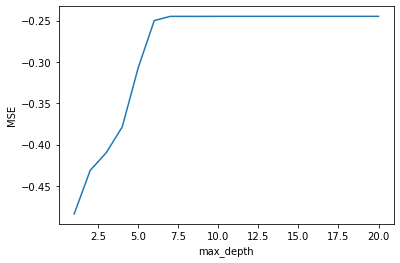

In [44]:
# Celda 5
# Definir matriz X y Y para entrenar los modelos
y_train = bikes["total"] 
bikes['hour'] = pd.factorize(bikes.hour)[0]
bikes['workingday'] = pd.factorize(bikes.workingday)[0]
X_train = pd.concat([bikes['hour'], bikes['workingday']], axis=1)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del MSE para cada valor de máxima profundidad (max_depth)
mse_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring=None).mean())

print("Calibracion del parametro max_depth")
# Gráfica max_depth versus MSE (error del modelo)
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

Hay que notar que se está usando el mismo conjunto de entrenamiento para calibrar un parámetro del modelo, por lo tanto, se espera que el comportamiento del MSE no sea cóncavo, es decir, no funciona para calibrar. Sin embargo, hacemos la calibración a pesar de lo anterior y obtenemos que: 

In [45]:
# Mejor MSE (desempeño del modelo) y su correspondiente max_depth
sorted(zip(mse_scores, max_depth_range), reverse = True)[::-1][0]

(-0.4841374721061996, 1)

La profundidad que minimiza el MSE es igual a 1, con un MSE de -0.48

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [46]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [47]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [48]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

El siguiente codigo puede tardar unos minutos. 

Estimando Modelo de Regresión logística
Modelo estimado

El Acurracy del modelo de regresión logística es 0.616
El F1-Score para el modelo de regresión logística es 0.6027586206896551


Estimando Modelo de Árbol
Modelo estimado

Calibracion del parametro max_depth para el modelo de Árbol


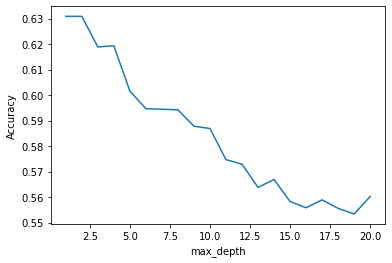

La maxima profundidad del arbol que tiene el mayor Accuracy es: 2

El Acurracy del árbol calibrado es 0.6308888888888888

El F1-Score para el modelo de árbol es 0.6448598130841121


In [49]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# Regresión logistica 
print("Estimando Modelo de Regresión logística")

clfRegLog= LogisticRegression(random_state=0,max_iter=10000) # Generar un modelo
clfRegLog.fit(X_train,y_train) #Estimar el modelo 
y_predReglog = clfRegLog.predict(X_test) #Predecir con el modelo de regresion logistica
print("Modelo estimado")
print("")
print("El Acurracy del modelo de regresión logística es " +  str(metrics.accuracy_score(y_predReglog, y_test)))
print("El F1-Score para el modelo de regresión logística es "+ str(metrics.f1_score(y_predReglog, y_test)))
print("\n")

##  Tree
max_depth_range = range(1, 21) #Rango de calibracion 
accuracy_scores = []
print("Estimando Modelo de Árbol")
# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy").mean())
print("Modelo estimado")
print("")
print("Calibracion del parametro max_depth para el modelo de Árbol")
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
print("La maxima profundidad del arbol que tiene el mayor Accuracy es: " +  str(sorted(zip(accuracy_scores, max_depth_range))[::-1][0][1]))
print("")
print("El Acurracy del árbol calibrado es " +  str(sorted(zip(accuracy_scores, max_depth_range))[::-1][0][0]))
print("")
#Predecir la variable y con el arbol de desicion calibrado
y_predTree = DecisionTreeClassifier(max_depth= sorted(zip(accuracy_scores, max_depth_range))[::-1][0][1] , random_state=1).fit(X, y).predict(X_test)
print("El F1-Score para el modelo de árbol es "+ str(metrics.f1_score(y_predTree, y_test)))


En el código anterior se estimaron 2 modelos de clasificación. En primer lugar, se realizó un modelo de regresión logística, posteriormente se estimó un modelo de árbol de decisión. 

Para el modelo de regresión logística tenemos que sus medidas de desempeño son: 

1. Acurracy: 0.616
2. F1-Score: 0.602

Por otro lado, para el modelo árbol de decisión **calibrado en una maxima profundidad de 2** tenemos que: 

1. Acurracy: 0.63
2. F1-Score: 0.64


Se puede concluir que para este caso particular el modelo de árbol de decisión tiene mejor desempeño predictivo que la regresión logística según las métricas Acurracy y  F1-Score.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [50]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

# Uso de BaggingRegressor de la libreria (sklearn) para estimar los diferentes modelos. 

bagg100TreeDepthNone = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth=None), n_estimators = 100, 
                          bootstrap=True, oob_score=True , max_samples = 300, random_state=1,n_jobs=-1)


bagg100TreeDepth2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators = 100, 
                          bootstrap=True, oob_score=True , max_samples = 300, random_state=1,n_jobs=-1)


bagg100RegLog = BaggingClassifier(LogisticRegression(random_state=1,max_iter=1000), n_estimators = 100, 
                          bootstrap=True, oob_score=True , max_samples = 300, random_state=1,n_jobs=-1)



# Entrenemiento de los modelos con set de entrenamiento y predicción en el set de test

print("Entrenamos modelo Tree Depth = None")
bagg100TreeDepthNone.fit(X_train, y_train)
y_predbagg100TreeDepthNone = bagg100TreeDepthNone.predict(X_test)
print('Modelo Entrenado')
print("")
print('El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = None son respectivamente')
print(metrics.f1_score(y_predbagg100TreeDepthNone, y_test), metrics.accuracy_score(y_predbagg100TreeDepthNone, y_test))

print('\n')
print("Entrenamos modelo Tree Depth = 2")
bagg100TreeDepth2.fit(X_train, y_train)
y_predbagg100TreeDepth2 = bagg100TreeDepth2.predict(X_test)
print('Modelo Entrenado')
print("")
print('El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = 2 son respectivamente')
print(metrics.f1_score(y_predbagg100TreeDepth2, y_test), metrics.accuracy_score(y_predbagg100TreeDepth2, y_test))

print('\n')
print("Entrenamos modelo Reg Logística")
bagg100RegLog.fit(X_train, y_train)
y_predbagg100RegLog = bagg100RegLog.predict(X_test)
print('Modelo Entrenado')
print("")
print('El F1-Score y el Acurracy del modelo Reg Logística son respectivamente')
print(metrics.f1_score(y_predbagg100RegLog, y_test), metrics.accuracy_score(y_predbagg100RegLog, y_test))


Entrenamos modelo Tree Depth = None
Modelo Entrenado

El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = None son respectivamente
0.6697798532354903 0.67


Entrenamos modelo Tree Depth = 2
Modelo Entrenado

El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = 2 son respectivamente
0.6490514905149052 0.6546666666666666


Entrenamos modelo Reg Logística
Modelo Entrenado

El F1-Score y el Acurracy del modelo Reg Logística son respectivamente
0.6149659863945578 0.6226666666666667


Podemos concluir que, según las métricas F1_Score y Acurracy, el mejor modelo de los 3 ensamblajes presentados es el modelo **Bagging Árbol de decisión SIN profundidad máxima con votación mayoritaria**  

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [51]:
# Celda 8

# Votación ponderada para el modelo bagging de Árbol con MaxDepth = None
errors = np.zeros(bagg100TreeDepthNone.n_estimators)
y_pred_all_ = np.zeros( (X_test.shape[0], bagg100TreeDepthNone.n_estimators) )
for i in range(bagg100TreeDepthNone.n_estimators):
    oob_sample = ~bagg100TreeDepthNone.estimators_samples_[i]
    y_pred_ = bagg100TreeDepthNone.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagg100TreeDepthNone.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Metricas con votación ponderada
print('El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = None y votación ponderada son respectivamente')
print(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))



print('\n')
#Votación ponderada para el modelo bagging de Árbol con MaxDepth = 2
errors = np.zeros(bagg100TreeDepth2.n_estimators)
y_pred_all_ = np.zeros( (X_test.shape[0], bagg100TreeDepth2.n_estimators) )
for i in range(bagg100TreeDepth2.n_estimators):
    oob_sample = ~bagg100TreeDepth2.estimators_samples_[i]
    y_pred_ = bagg100TreeDepth2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagg100TreeDepth2.estimators_[i].predict(X_test)
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Metricas con votación ponderada
print('El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = 2 y votación ponderada son respectivamente')
print(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))



print('\n')
#Votación ponderada para el modelo Reg Logística
errors = np.zeros(bagg100RegLog.n_estimators)
y_pred_all_ = np.zeros( (X_test.shape[0], bagg100RegLog.n_estimators) )

for i in range(bagg100RegLog.n_estimators):
    oob_sample = ~bagg100RegLog.estimators_samples_[i]
    y_pred_ = bagg100RegLog.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = bagg100RegLog.estimators_[i].predict(X_test)  
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
# Metricas con votación ponderada
print('El F1-Score y el Acurracy del modelo regresión logística con votación ponderada son respectivamente')
print(metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test))



El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = None y votación ponderada son respectivamente
0.6724023825281271 0.67


El F1-Score y el Acurracy del modelo bagging de Árbol con MaxDepth = 2 y votación ponderada son respectivamente
0.6445047489823609 0.6506666666666666


El F1-Score y el Acurracy del modelo regresión logística con votación ponderada son respectivamente
0.6142270861833106 0.624


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.


En los puntos 7 y 8 se generaron ensamblajes con distintos tipos de clasificadores. Se utilizaron los siguientes modelos

1. Árbol de decisión con profundidad indefinida
2. Árbol de decisión con profundidad de 2. 
3. Regresión logística 

Para cada clasificador se generaron 300 muestras a partir de bootstrap. Finalmente, pare realizar la predicción de cada ensamblaje se propuso: 
 
 **En el punto 7:** Las predicciones se realizaron por el método de **votación mayoritaria**, es decir, se escoge como predicción final aquella clase que tenga la mayoría de las predicciones a su favor. Esto quiere decir que se le da el mismo "peso" a todas las predicciones sin importar el error de cada modelo. 
 
 **En el punto 8:** Las predicciones se hicieron por el método de **votación ponderada**, esto significa que la predicción final depende de una ponderación porcentual de todas las predicciones. Aquellas predicciones que aportan *más* a la predicción final son las que vienen de un modelo con error OOB bajo. De igual manera, las predicciones que *menos* aportan a la predicción final son aquellas que tiene un error OOB mayor.
 
Podemos ver que todas las métricas para cada uno de los 3 ensamblajes están mejorando. Es decir, **la votación ponderada es un mejor método que la votación mayoritaria**. Sin embargo, la mejora en las métricas es pequeña.